## 1D Zero-padding


In [1]:
# method 1
import random 

data = [random.randint(0,10) for _ in range(10)]
data_len = len(data)
print('Input data: ',data)
print('Length of data: ',len(data),'\n')

pad = 2

padded_data = []
for data_idx in range(data_len + 2*pad):
    if data_idx < pad:
        padded_data.append(0)
    elif data_idx >= data_len + pad:
        padded_data.append(0)
    else:
        padded_data.append(data[data_idx-pad])
print('Padded data:',padded_data)
print('Length of padded data: ',len(padded_data))

Input data:  [1, 9, 10, 1, 0, 10, 10, 7, 10, 8]
Length of data:  10 

Padded data: [0, 0, 1, 9, 10, 1, 0, 10, 10, 7, 10, 8, 0, 0]
Length of padded data:  14


In [2]:
# method 2
import random 

data = [random.randint(0,10) for _ in range(10)]
data_len = len(data)
print('Input data: ',data)
print('Length of data: ',len(data),'\n')

pad = 3

padded_data = []
for _ in range(pad):
    padded_data.append(0)
padded_data = padded_data + data
for _ in range(pad):
    padded_data.append(0)
print('Padded data:',padded_data)
print('Length of padded data: ',len(padded_data))

Input data:  [2, 5, 7, 10, 2, 7, 0, 3, 8, 1]
Length of data:  10 

Padded data: [0, 0, 0, 2, 5, 7, 10, 2, 7, 0, 3, 8, 1, 0, 0, 0]
Length of padded data:  16


In [3]:
# method 3
import random 

data = [random.randint(0,10) for _ in range(10)]
data_len = len(data)
print('Input data: ',data)
print('Length of data: ',len(data),'\n')

pad = 1

padded_data = [0]*pad + data + [0]*pad
print('Padded data:',padded_data)
print('Length of padded data: ',len(padded_data))

Input data:  [5, 7, 9, 5, 4, 1, 8, 10, 1, 5]
Length of data:  10 

Padded data: [0, 5, 7, 9, 5, 4, 1, 8, 10, 1, 5, 0]
Length of padded data:  12


## 1D Average pooling with Zero-padding

In [4]:
import random

pool_size = 3
pad = int((pool_size - 1)/2)

data = [random.randint(0,10) for _ in range(10)]
data_len = len(data)
print('Input data: ',data)
print('Length of data: ',len(data),'\n')

padded_data = [0]*pad + data + [0]*pad
print('Padded data:',padded_data)
print('Length of padded data: ',len(padded_data),'\n')

valid_len = len(padded_data) - pool_size + 1
pooled = []
for pool_loc in range(valid_len):
    window = padded_data[pool_loc : pool_loc + pool_size]
    
    window_sum = 0
    for window_val in window:
        window_sum += window_val
    window_mean = window_sum / pool_size
    pooled.append(window_mean)

print('Pooled data:',pooled)
print('Length of pooled data:',len(pooled))

Input data:  [10, 7, 1, 2, 9, 6, 2, 8, 10, 6]
Length of data:  10 

Padded data: [0, 10, 7, 1, 2, 9, 6, 2, 8, 10, 6, 0]
Length of padded data:  12 

Pooled data: [5.666666666666667, 6.0, 3.3333333333333335, 4.0, 5.666666666666667, 5.666666666666667, 5.333333333333333, 6.666666666666667, 8.0, 5.333333333333333]
Length of pooled data: 10


## 1D Correlation with Zero-padding

Input data:  [2, 9, 9, 2, 3, 7, 7, 8, 0, 3]
Length of data:  10 

Padded data: [0, 2, 9, 9, 2, 3, 7, 7, 8, 0, 3, 0]
Length of padded data:  12 

Correlation: [11, 16, 2, -4, 8, 11, 8, 1, -5, 3]
Length of Correlation: 10 



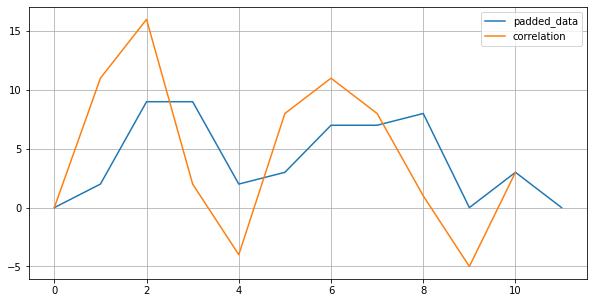

In [5]:
import random
import matplotlib.pyplot as plt

corr_filter = [-1,1,1]
filter_size = len(corr_filter)
pad = int((filter_size - 1)/2)

data = [random.randint(0,10) for _ in range(10)]
data_len = len(data)
print('Input data: ',data)
print('Length of data: ',len(data),'\n')

padded_data = [0]*pad + data + [0]*pad
print('Padded data:',padded_data)
print('Length of padded data: ',len(padded_data),'\n')

valid_len = len(padded_data) - filter_size + 1

correlation = []
for filter_loc in range(valid_len):
    window = padded_data[filter_loc : filter_loc + filter_size]
    
    corr = 0
    for window_val, filter_val in zip(window, corr_filter):
        corr += window_val * filter_val
    correlation.append(corr)
print('Correlation:',correlation)
print('Length of Correlation:',len(correlation),'\n')

fig, ax = plt.subplots(figsize=(10,5))
correlation = [0] + correlation
ax.plot(padded_data, label = 'padded_data')
ax.plot(correlation, label = 'correlation')
ax.legend(fontsize=10)
ax.grid()